In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from tqdm import tqdm # progress bar
from torch.optim import Adam

# custom modules
from model import (StentOnlineDataset, # custom on-the-go augmentation dataset
                   UNet) # our PyTorch U-Net model

## Data Augmentation

In [8]:
n_images = 2000
epochs = 1

# custom image dataset class with on-the-go augmentation
dataset = StentOnlineDataset(n_images=n_images, base_image_path="data/dataset/base_png")
# pytorch dataset object
data_loader = DataLoader(dataset, batch_size=1, shuffle=False)

In [5]:
model = UNet(in_channels=1, out_channels=1)
model.double()
criterion = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.001)

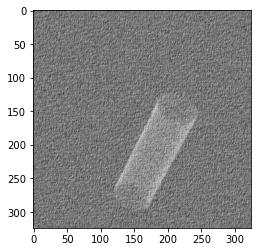

In [6]:
# initial prediction image
plt.imshow(dataset[26][0], cmap="gray")
prediction = model(dataset[26][0].reshape(1, 512, 512))
plt.imshow(prediction.detach().numpy()[0], cmap="gray")

  0%|          | 0/2000 [00:00<?, ?it/s]

Epoch [1/1], Step [1/2000], Loss: 1.0110


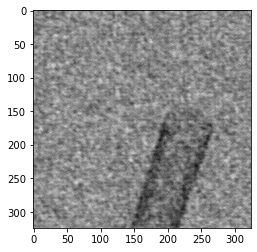

  0%|          | 1/2000 [00:09<5:05:31,  9.17s/it]

Epoch [1/1], Step [2/2000], Loss: 0.8027


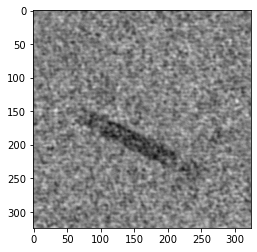

  0%|          | 2/2000 [00:17<4:48:51,  8.67s/it]

Epoch [1/1], Step [3/2000], Loss: 0.3391


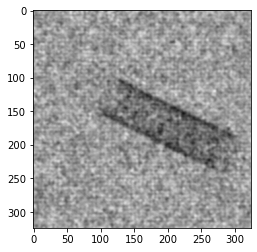

  0%|          | 3/2000 [00:25<4:37:20,  8.33s/it]

Epoch [1/1], Step [4/2000], Loss: 1.1812


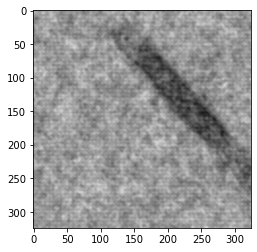

  0%|          | 4/2000 [00:34<4:50:19,  8.73s/it]

Epoch [1/1], Step [5/2000], Loss: 0.0891


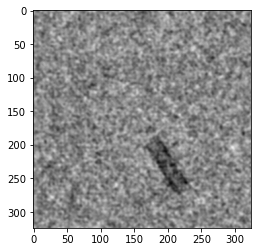

  0%|          | 5/2000 [00:42<4:41:25,  8.46s/it]

Epoch [1/1], Step [6/2000], Loss: 0.2843


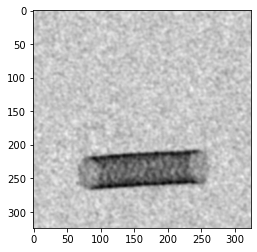

  0%|          | 6/2000 [00:50<4:38:02,  8.37s/it]

Epoch [1/1], Step [7/2000], Loss: 0.3837


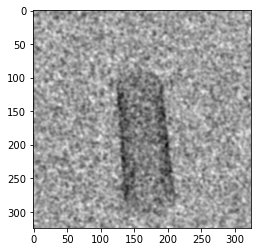

  0%|          | 7/2000 [00:59<4:35:30,  8.29s/it]

Epoch [1/1], Step [8/2000], Loss: 0.4063


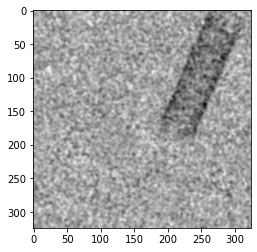

  0%|          | 8/2000 [01:08<4:51:18,  8.77s/it]

Epoch [1/1], Step [9/2000], Loss: 0.3882


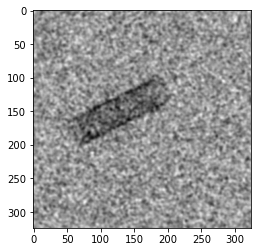

  0%|          | 9/2000 [01:17<4:48:39,  8.70s/it]

Epoch [1/1], Step [10/2000], Loss: 0.3389


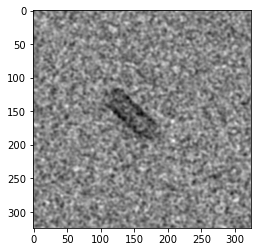

  0%|          | 10/2000 [01:26<4:55:34,  8.91s/it]

Epoch [1/1], Step [11/2000], Loss: 0.2525


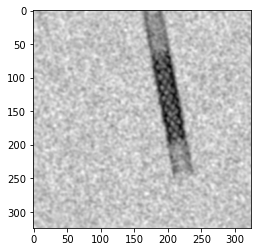

  1%|          | 11/2000 [01:35<4:50:47,  8.77s/it]

Epoch [1/1], Step [12/2000], Loss: 0.1723


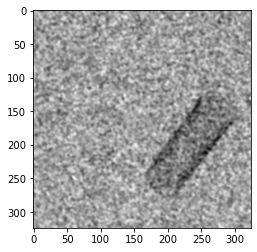

  1%|          | 12/2000 [01:43<4:46:44,  8.65s/it]

Epoch [1/1], Step [13/2000], Loss: 0.0815


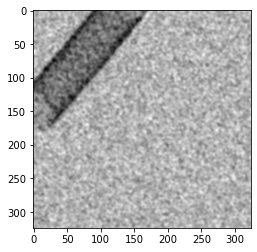

  1%|          | 13/2000 [01:51<4:42:32,  8.53s/it]

Epoch [1/1], Step [14/2000], Loss: 0.0222


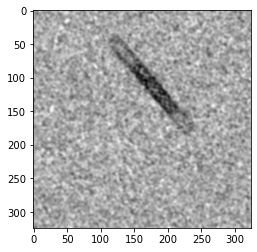

  1%|          | 14/2000 [02:00<4:38:27,  8.41s/it]

Epoch [1/1], Step [15/2000], Loss: 0.0009


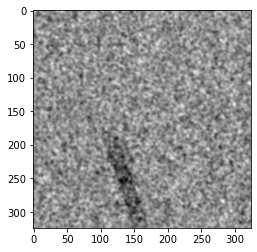

  1%|          | 15/2000 [02:17<5:02:12,  9.13s/it]


KeyboardInterrupt: 

In [10]:
# training
losses = []
for epoch in range(epochs):
    for i, data in enumerate(tqdm(data_loader)):
        # get the inputs
        inputs, targets = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        # print statistics
        losses.append(loss.item())
        print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
              .format(epoch + 1, epochs, i + 1, len(data_loader), loss.item()))
        if i < 20 or i % 20 == 0:
            plt.figure()
            plt.imshow(outputs.detach().numpy()[0], cmap="gray")
            plt.show()

In [ ]:
# save the model
